In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
#from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
fc = pd.read_csv('Fraud_check.csv')

In [3]:
fc

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [ ]:
fc.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [ ]:
fc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


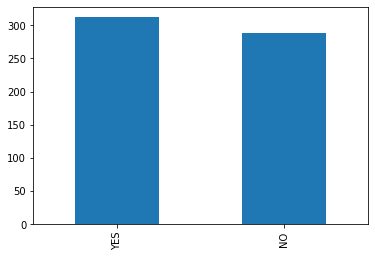

In [ ]:
pd.value_counts(fc['Undergrad']).plot.bar()

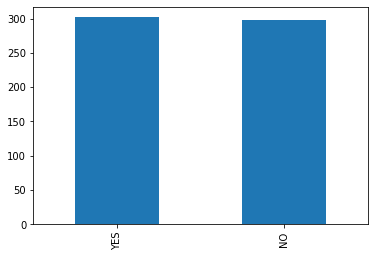

In [ ]:
pd.value_counts(fc['Urban']).plot.bar()

In [4]:
fc.columns=['Undergrad','Marital Status','Taxable Income','City Population','Work Experience','Urban']

In [5]:
fc

,Undergrad,Marital Status,Taxable Income,City Population,Work Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [9]:
fc['Tax Class'] = np.where(fc['Taxable Income']<=30000, True, False)#here risky inome value is True and safe income value is false 

In [10]:
fc

,Undergrad,Marital Status,Taxable Income,City Population,Work Experience,Urban,Tax Class
0,NO,Single,68833,50047,10,YES,False
1,YES,Divorced,33700,134075,18,YES,False
2,NO,Married,36925,160205,30,YES,False
3,YES,Single,50190,193264,15,YES,False
4,NO,Married,81002,27533,28,NO,False
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,False
596,YES,Divorced,69967,55369,2,YES,False
597,NO,Divorced,47334,154058,0,YES,False
598,YES,Married,98592,180083,17,NO,False


In [11]:
label_encoder = preprocessing.LabelEncoder()
fc['Tax Class']= label_encoder.fit_transform(fc['Tax Class']) 

In [12]:
fc

,Undergrad,Marital Status,Taxable Income,City Population,Work Experience,Urban,Tax Class
0,NO,Single,68833,50047,10,YES,0
1,YES,Divorced,33700,134075,18,YES,0
2,NO,Married,36925,160205,30,YES,0
3,YES,Single,50190,193264,15,YES,0
4,NO,Married,81002,27533,28,NO,0
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,0
596,YES,Divorced,69967,55369,2,YES,0
597,NO,Divorced,47334,154058,0,YES,0
598,YES,Married,98592,180083,17,NO,0


In [13]:
fc['Tax Class'].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [14]:

df =fc.drop(columns =['Taxable Income'])#no need of taxaabe income column as there is Tax Class

In [15]:
df

,Undergrad,Marital Status,City Population,Work Experience,Urban,Tax Class
0,NO,Single,50047,10,YES,0
1,YES,Divorced,134075,18,YES,0
2,NO,Married,160205,30,YES,0
3,YES,Single,193264,15,YES,0
4,NO,Married,27533,28,NO,0
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,0
596,YES,Divorced,55369,2,YES,0
597,NO,Divorced,154058,0,YES,0
598,YES,Married,180083,17,NO,0


In [17]:

label_encoder = preprocessing.LabelEncoder()
df['Undergrad']=label_encoder.fit_transform(df['Undergrad'])
df['Marital Status']=label_encoder.fit_transform(df['Marital Status'])
df['Urban']=label_encoder.fit_transform(df['Urban'])

In [18]:
df

,Undergrad,Marital Status,City Population,Work Experience,Urban,Tax Class
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


In [19]:
df.describe()

,Undergrad,Marital Status,City Population,Work Experience,Urban,Tax Class
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.520000,1.046667,108747.368333,15.558333,0.503333,0.206667
std,0.500017,0.821958,49850.075134,8.842147,0.500406,0.405252
min,0.000000,0.000000,25779.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,66966.750000,8.000000,0.000000,0.000000
50%,1.000000,1.000000,106493.500000,15.000000,1.000000,0.000000
75%,1.000000,2.000000,150114.250000,24.000000,1.000000,0.000000
max,1.000000,2.000000,199778.000000,30.000000,1.000000,1.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int64
 1   Marital Status   600 non-null    int64
 2   City Population  600 non-null    int64
 3   Work Experience  600 non-null    int64
 4   Urban            600 non-null    int64
 5   Tax Class        600 non-null    int64
dtypes: int64(6)
memory usage: 28.2 KB


In [23]:
x=df.iloc[:,0:-1]
y=df['Tax Class']

In [24]:
x

,Undergrad,Marital Status,City Population,Work Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [25]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Tax Class, Length: 600, dtype: int64

In [26]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [27]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

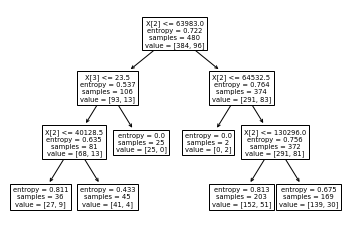

In [28]:
#PLot the decision tree
tree.plot_tree(model);


[Text(465.0, 792.75, 'City Population <= 63983.0\nentropy = 0.722\nsamples = 480\nvalue = [384, 96]\nclass = 0(Good)'),
 Text(279.0, 566.25, 'Work Experience <= 23.5\nentropy = 0.537\nsamples = 106\nvalue = [93, 13]\nclass = 0(Good)'),
 Text(186.0, 339.75, 'City Population <= 40128.5\nentropy = 0.635\nsamples = 81\nvalue = [68, 13]\nclass = 0(Good)'),
 Text(93.0, 113.25, 'entropy = 0.811\nsamples = 36\nvalue = [27, 9]\nclass = 0(Good)'),
 Text(279.0, 113.25, 'entropy = 0.433\nsamples = 45\nvalue = [41, 4]\nclass = 0(Good)'),
 Text(372.0, 339.75, 'entropy = 0.0\nsamples = 25\nvalue = [25, 0]\nclass = 0(Good)'),
 Text(651.0, 566.25, 'City Population <= 64532.5\nentropy = 0.764\nsamples = 374\nvalue = [291, 83]\nclass = 0(Good)'),
 Text(558.0, 339.75, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = 1(Risky)'),
 Text(744.0, 339.75, 'City Population <= 130296.0\nentropy = 0.756\nsamples = 372\nvalue = [291, 81]\nclass = 0(Good)'),
 Text(651.0, 113.25, 'entropy = 0.813\nsamples = 203\nv

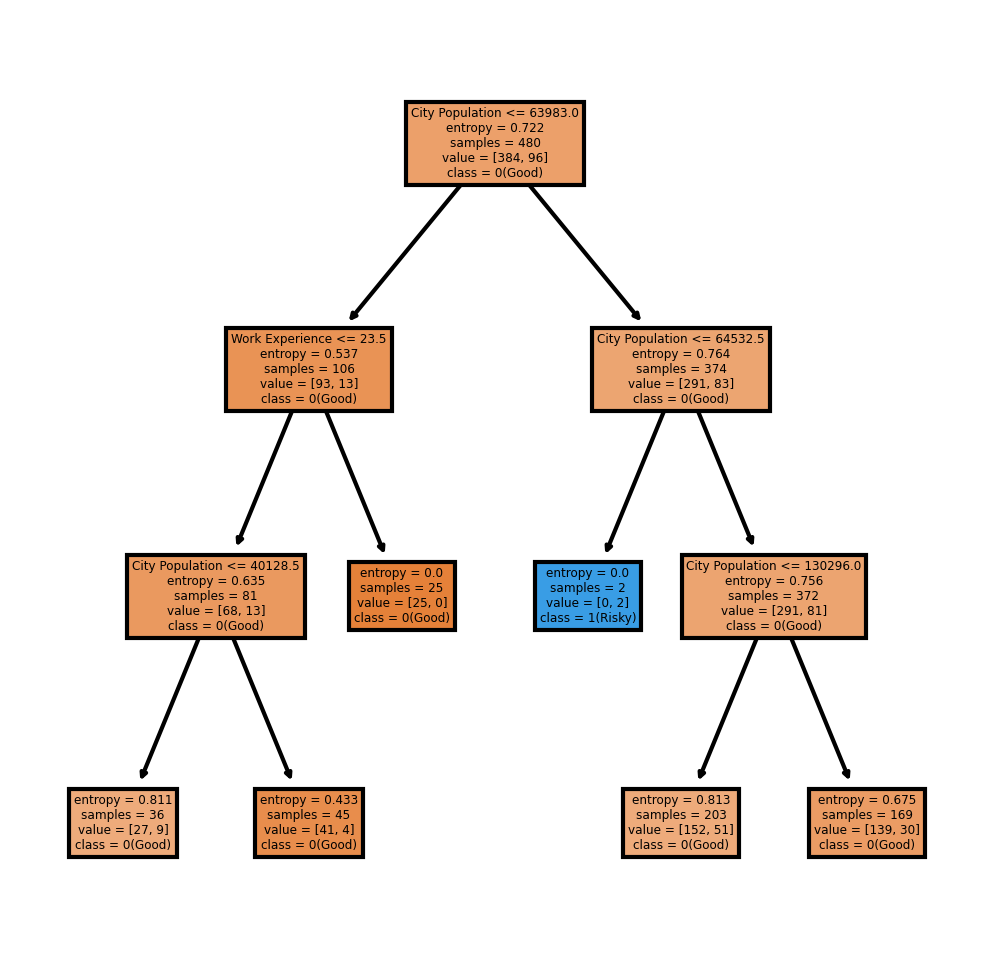

In [29]:

fn =['Undergrad','Marital Status','City Population','Work Experience','Urban']
cn=["0(Good)", "1(Risky)"]
fig,axes =plt.subplots(nrows=1,ncols=1,figsize =(4,4),dpi =300)
tree.plot_tree(model,feature_names=fn,
               class_names=cn,
               filled= True)

In [30]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,classification_report

In [33]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    120
dtype: int64

In [34]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0
Tax Class,
0,92
1,28


In [35]:
accuracy =accuracy_score(y_test,preds)
print(accuracy)

0.7666666666666667
